# Assignment # 01: Data Preprocessing and Visualization

# CS471: Machine Learning
### BESE-8 AB
### Instructors: Prof. Dr. Faisal Shafait, Dr. Muhammad Muneeb Ullah
#### Due Date: March 18, 2020

### Introduction

The Novel Coronavirus (COVID19) which causes respiratory illnesss was first detected in Wuhan, China. Since the disease is contagious, it has spread all over the world due to the high number of tourism and business visits to / from China. As you all are very well aware, COVID19 has been labelled as a global pandemic now by World Health Organization. Countries such as Italy, China, Qatar, USA, Saudi Arabia, etc, have cancelled most of the flights and a lockdown notice has been issued in Italy to avoid further wide-spread of the virus. 
Scientists all over the world are trying to drive insights from the datasets to come up with a possible prediction which will help with early diagnosis of COVID-19, estimating the spread, and the virus frequency and duration. 
Johns Hopkins University has made an excellent dashboard using the affected cases data. The dataset is made available at Kaggle and can be downloaded for the purpose of research.
For this assignment, we will use the Kaggle COVID-19 dataset (Download here: <a href="https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset" title="DATASET">DATASET</a>) and will try to learn some insights using the power of Machine Learning.
The Johns Hopkins University's web based dashboard can be accessed here:
<a href="https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6" title="Web Dashboard">Web Dashboard</a>

In [0]:
import pandas as pd
import numpy as np

#### Question # 01

As you must have noticed, there are 6 files in the data you have downloaded from Kaggle.
For this question, we will use the main file `covid_19_data.csv`.
The steps to follow are given:
1. Read the data file and examine the features
2. Since the dataset is a bit sparse, clean the dataset by dropping rows which have missing points.
3. Print the initial 10 rows of the data.

In [37]:
#Task 1
dataset = pd.read_csv("covid_19_data.csv")

print("The original dataset is: ","\n")
print(dataset)
print("\n\n")

#Task 2
cleaned_dataset = dataset.dropna()
print("The cleaned dataset with the empty fields/rows removed is: ","\n")
print(cleaned_dataset)

#Task 3
print("\n\n")
print("The first 10 rows of dataset are as follows: ","\n")
print(cleaned_dataset[:10])



The original dataset is:  

       SNo ObservationDate  ... Deaths Recovered
0        1      01/22/2020  ...    0.0       0.0
1        2      01/22/2020  ...    0.0       0.0
2        3      01/22/2020  ...    0.0       0.0
3        4      01/22/2020  ...    0.0       0.0
4        5      01/22/2020  ...    0.0       0.0
...    ...             ...  ...    ...       ...
5627  5628      03/14/2020  ...    0.0       0.0
5628  5629      03/14/2020  ...    0.0       1.0
5629  5630      03/14/2020  ...    0.0       0.0
5630  5631      03/14/2020  ...    0.0       0.0
5631  5632      03/14/2020  ...    0.0       0.0

[5632 rows x 8 columns]



The cleaned dataset with the empty fields/rows removed is:  

       SNo ObservationDate  ... Deaths Recovered
0        1      01/22/2020  ...    0.0       0.0
1        2      01/22/2020  ...    0.0       0.0
2        3      01/22/2020  ...    0.0       0.0
3        4      01/22/2020  ...    0.0       0.0
4        5      01/22/2020  ...    0.0       0.0


#### Question # 02

1. Rank the countries in the dataset in descending order according to the number of deaths.
2. Figure out the most affected provinces/states in top 3 countries with most number of Deaths.
3. Repeat the first two steps for Recovered and Confirmed cases as well.
4. Plot a bar graph for top 10 states in China and US in accordance to the death cases, and recovered cases.

In [38]:
#Task 1
sorted_acc_deaths = cleaned_dataset.sort_values(by="Deaths",ascending=False)
sorted_acc_deaths = sorted_acc_deaths.drop_duplicates(subset=["Province/State"], keep='first')
array_countries = sorted_acc_deaths.groupby("Country/Region")["Deaths"].sum().sort_values(ascending=False)
print("The countries sorted according to the deaths are as follows: ","\n")
print(array_countries,"\n\n")


The countries sorted according to the deaths are as follows:  

Country/Region
Mainland China    3193.0
France              91.0
US                  77.0
UK                  29.0
Others               7.0
Australia            4.0
Taiwan               1.0
Denmark              1.0
Canada               1.0
Macau                0.0
Germany              0.0
Austria              0.0
Name: Deaths, dtype: float64 




In [39]:
#Task 2

unique_max_countries = array_countries.index.values[0:3]
group_max_countries = sorted_acc_deaths.groupby("Country/Region")
print("The most affected provices are as follows: ","\n")
for i in unique_max_countries:
    maxi = group_max_countries.get_group(i)
    print(maxi["Province/State"][0:1])

The most affected provices are as follows:  

5383    Hubei
Name: Province/State, dtype: object
5389    France
Name: Province/State, dtype: object
5409    Washington
Name: Province/State, dtype: object


In [40]:
#Task 3

#RECOVERED
print("Solution for the provinces recovered are as follows...","\n")
sorted_acc_deaths = cleaned_dataset.sort_values(by="Recovered",ascending=False)
sorted_acc_deaths = sorted_acc_deaths.drop_duplicates(subset=["Country/Region"], keep='first')
sorted_acc_deaths = sorted_acc_deaths.drop_duplicates(subset=["Province/State"], keep='first')
array_countries = sorted_acc_deaths.groupby("Country/Region")["Recovered"].sum().sort_values(ascending=False)
print("The countries sorted according to recovered are as follows: ","\n")
print(array_countries,"\n\n")


unique_max_countries = array_countries.index.values[0:3]
group_max_countries = sorted_acc_deaths.groupby("Country/Region")
print("The most recovered provices are as follows: ","\n")
for i in unique_max_countries:
    maxi = group_max_countries.get_group(i)
    print(maxi["Province/State"][0:1])


Solution for the provinces recovered are as follows... 

The countries sorted according to recovered are as follows:  

Country/Region
Mainland China    52960.0
Others              325.0
Hong Kong            65.0
UK                   18.0
Taiwan               17.0
France               12.0
Macau                10.0
Australia             8.0
US                    6.0
Canada                4.0
Denmark               1.0
Israel                0.0
Germany               0.0
Austria               0.0
Name: Recovered, dtype: float64 


The most recovered provices are as follows:  

5383    Hubei
Name: Province/State, dtype: object
4733    Diamond Princess cruise ship
Name: Province/State, dtype: object
4559    Hong Kong
Name: Province/State, dtype: object


In [41]:

#CONFIRMED
print("\n\nSolution for the provinces confirmed are as follows...","\n")
sorted_acc_deaths = cleaned_dataset.sort_values(by="Confirmed",ascending=False)
sorted_acc_deaths = sorted_acc_deaths.drop_duplicates(subset=["Country/Region"], keep='first')
sorted_acc_deaths = sorted_acc_deaths.drop_duplicates(subset=["Province/State"], keep='first')
array_countries = sorted_acc_deaths.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False)
print("The countries sorted according to Confirmed cases are as follows: ","\n")
print(array_countries,"\n\n")


unique_max_countries = array_countries.index.values[0:3]
group_max_countries = sorted_acc_deaths.groupby("Country/Region")
print("The most Confirmed provices are as follows: ","\n")
for i in unique_max_countries:
    maxi = group_max_countries.get_group(i)
    print(maxi["Province/State"][0:1])





Solution for the provinces confirmed are as follows... 

The countries sorted according to Confirmed cases are as follows:  

Country/Region
Mainland China    67790.0
France             4469.0
UK                 1140.0
Denmark             827.0
Others              706.0
US                  572.0
Hong Kong           120.0
Australia           112.0
Canada               79.0
Taiwan               47.0
Macau                10.0
Germany               5.0
Austria               2.0
Israel                1.0
Name: Confirmed, dtype: float64 


The most Confirmed provices are as follows:  

5383    Hubei
Name: Province/State, dtype: object
5389    France
Name: Province/State, dtype: object
5394    United Kingdom
Name: Province/State, dtype: object


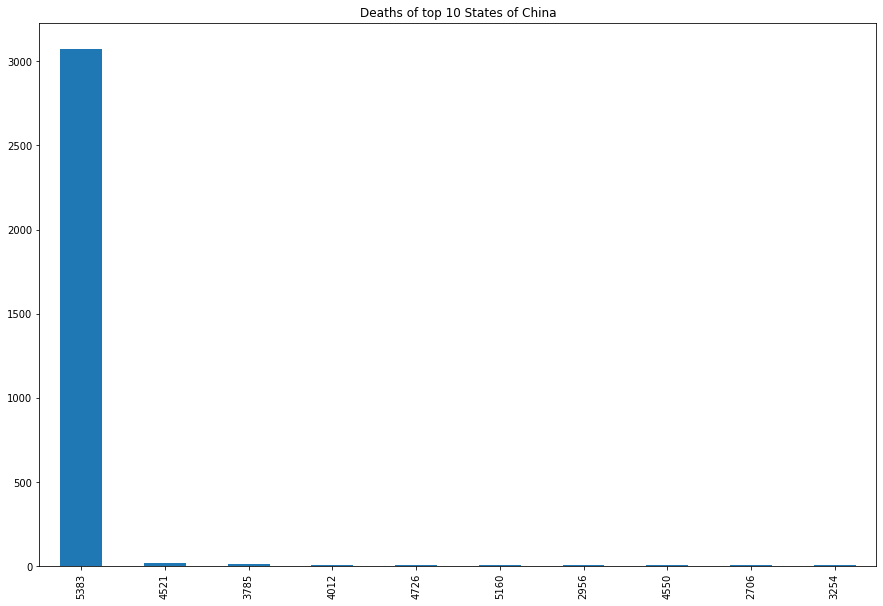

In [42]:
#TASK 4
#CHINA

#Deaths
#x-axis is the index of the provinces
#y-axis is the number of deaths
sorted_acc_deaths = cleaned_dataset.sort_values(by="Deaths",ascending=False)
boolean=sorted_acc_deaths["Country/Region"] == "Mainland China"
only_China = sorted_acc_deaths[boolean]
only_China = only_China.drop_duplicates(subset=["Province/State"], keep='first')
only_China = only_China.head(10)
only_China["Deaths"].plot.bar(title="Deaths of top 10 States of China", figsize=(15,10));

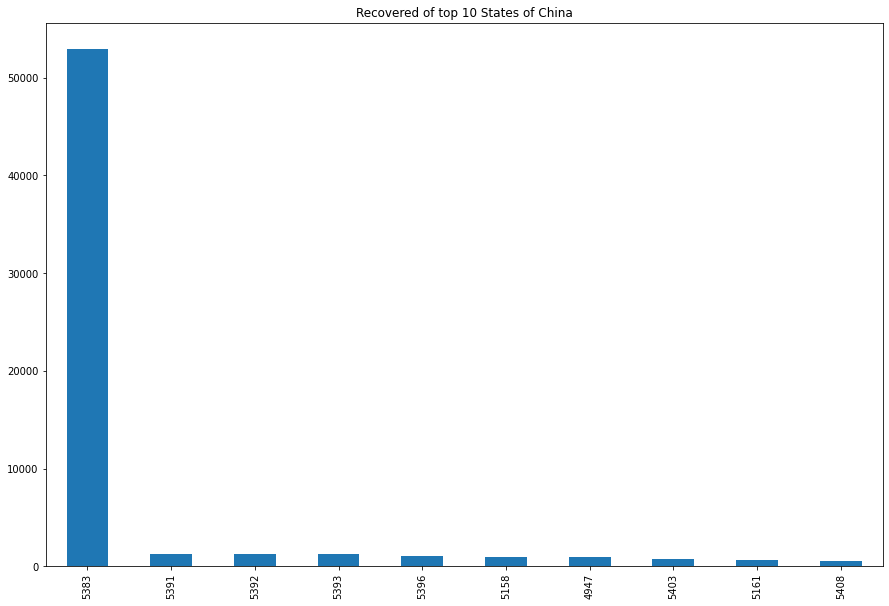

In [43]:
#RECOVERED
#x-axis is the index of the provinces
#y-axis is the number of recovered
sorted_acc_deaths = cleaned_dataset.sort_values(by="Recovered",ascending=False)
boolean=sorted_acc_deaths["Country/Region"] == "Mainland China"
only_China = sorted_acc_deaths[boolean]
only_China = only_China.drop_duplicates(subset=["Province/State"], keep='first')
only_China = only_China.head(10)
only_China["Recovered"].plot.bar(title="Recovered of top 10 States of China", figsize=(15,10));

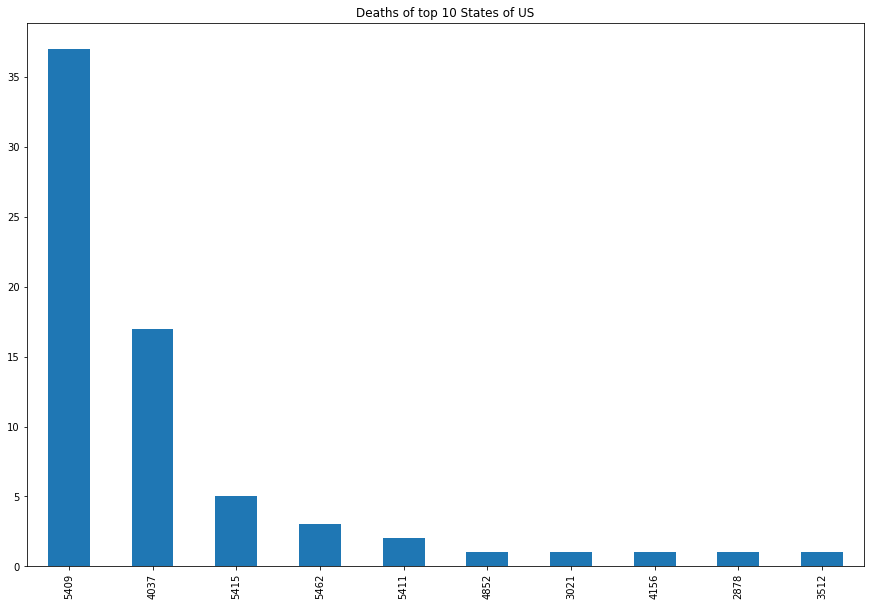

In [44]:
#USA

#DEATHS
#x-axis is the index of the provinces
#y-axis is the number of deaths
sorted_acc_deaths = cleaned_dataset.sort_values(by="Deaths",ascending=False)
boolean=sorted_acc_deaths["Country/Region"] == "US"
only_China = sorted_acc_deaths[boolean]
only_China = only_China.drop_duplicates(subset=["Province/State"], keep='first')
only_China = only_China.head(10)
only_China["Deaths"].plot.bar(title="Deaths of top 10 States of US", figsize=(15,10));



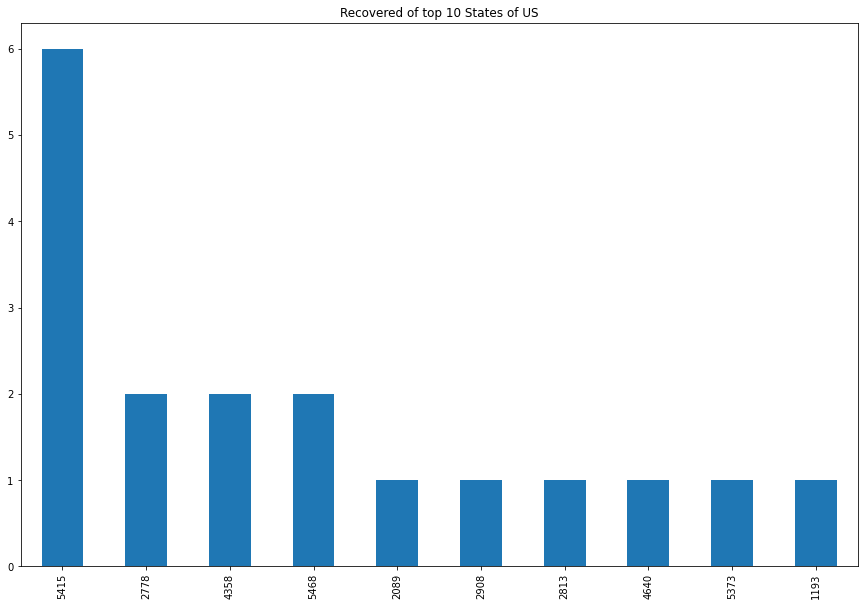

In [45]:
#RECOVERED
#x-axis is the index of the provinces
#y-axis is the number of recovered
sorted_acc_deaths = cleaned_dataset.sort_values(by="Recovered",ascending=False)
boolean=sorted_acc_deaths["Country/Region"] == "US"
only_China = sorted_acc_deaths[boolean]
only_China = only_China.drop_duplicates(subset=["Province/State"], keep='first')
only_China = only_China.head(10)
only_China["Recovered"].plot.bar(title="Recovered of top 10 States of US", figsize=(15,10));

#### Question # 03

Since we have dates in the data, let's quantify out how the virus has spread over time and which areas are most affected by the virus. This will help us figure out if the situation is getting any better over time or not.

1. Plot the confirmed, deaths and recovered cases as line graphs with dates for US, Iran and China each.
2. Looking at the plots, explain which country has seen a surge in confirmed, and death cases?
3. Work out the death rate due to COVID-19 in these three countries.
4. By examining the plots, which country has been able to efficiently and swiftly recover the confirmed cases? Work out the recovery rate for each country (US, Iran and China) and then answer the question?

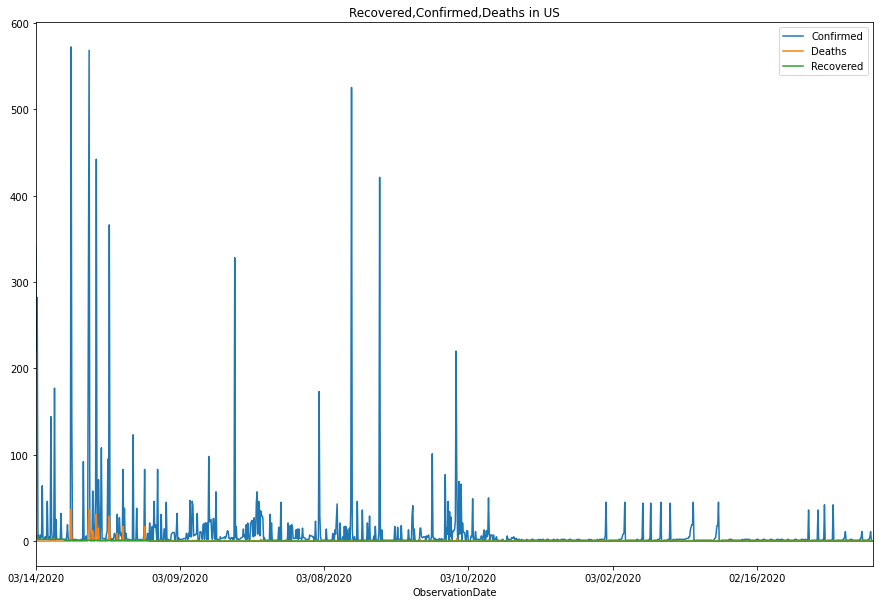

In [46]:
#TASK 1

#US
boolean=sorted_acc_deaths["Country/Region"] == "US"
only_US = sorted_acc_deaths[boolean]
only_US.plot.line(x="ObservationDate", y=['Confirmed','Deaths','Recovered'] ,title="Recovered,Confirmed,Deaths in US", figsize=(15,10));


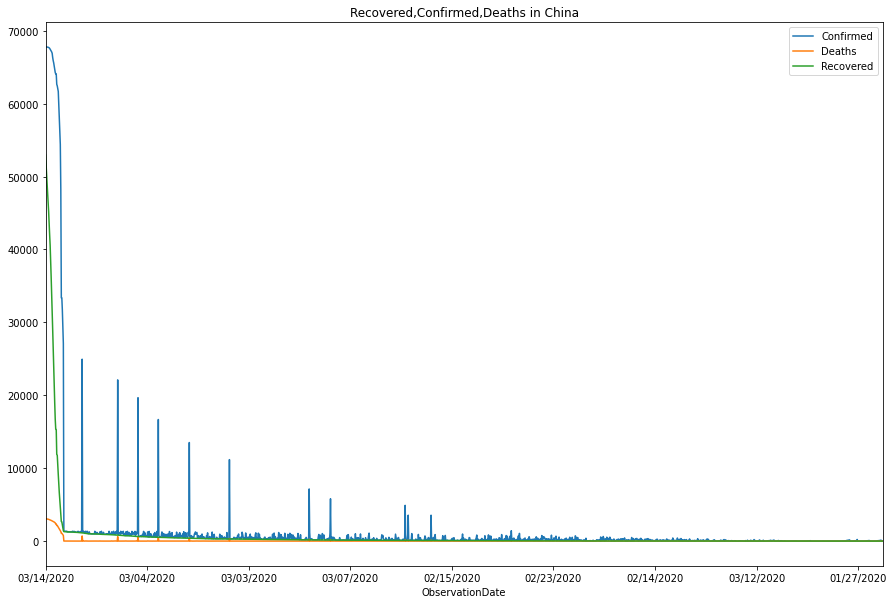

In [47]:
#CHINA
boolean=sorted_acc_deaths["Country/Region"] == "Mainland China"
only_China = sorted_acc_deaths[boolean]
only_China.plot.line(x="ObservationDate", y=['Confirmed','Deaths','Recovered'] ,title="Recovered,Confirmed,Deaths in China", figsize=(15,10));


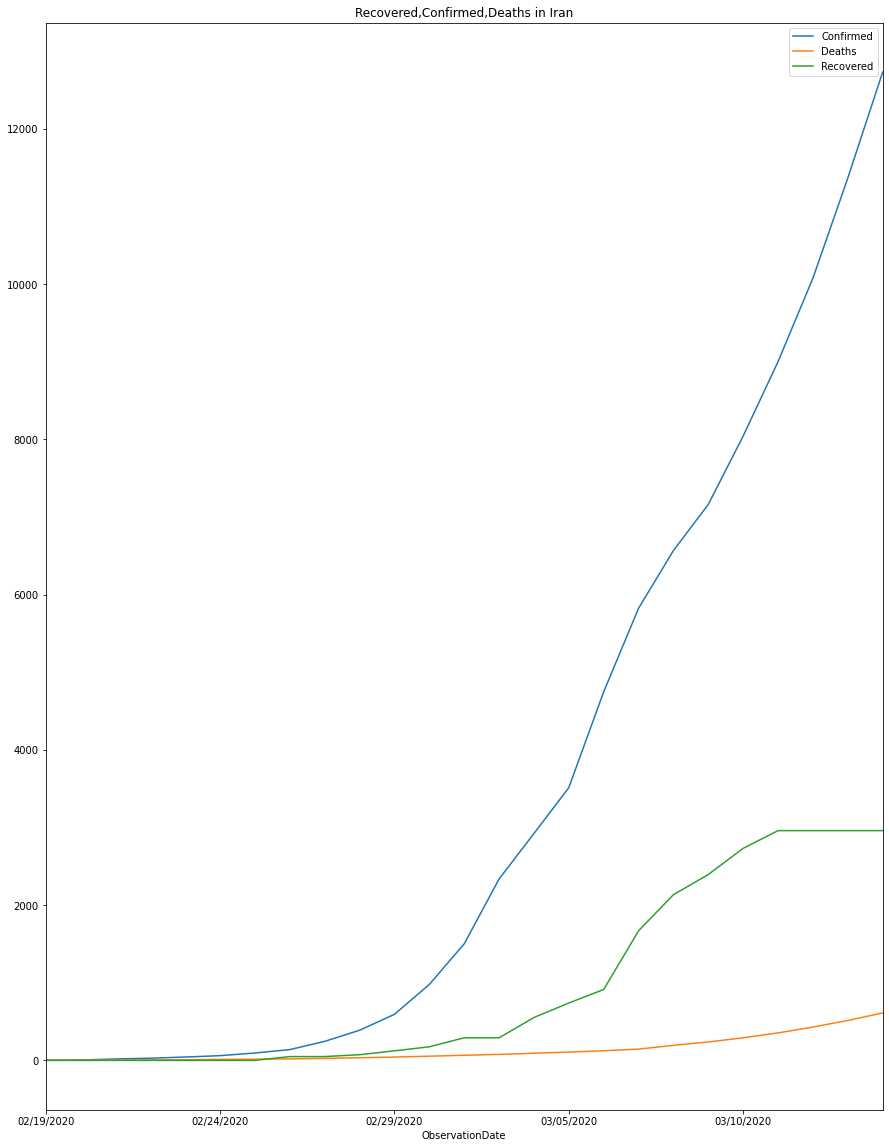

In [48]:
#IRAN
boolean=dataset["Country/Region"] == "Iran"
only_Iran = dataset[boolean]
only_Iran.plot.line(x="ObservationDate", y=['Confirmed','Deaths','Recovered'] ,title="Recovered,Confirmed,Deaths in Iran", figsize=(15,20));


In [49]:
#TASK 2

print("As we can see from the graphs above Iran experiences a surge in the number of confirmed cases and the deaths")

As we can see from the graphs above Iran experiences a surge in the number of confirmed cases and the deaths


In [50]:
#TASK 3

#US
boolean=sorted_acc_deaths["Country/Region"] == "US"
only_US = sorted_acc_deaths[boolean]
only_US = only_US.drop_duplicates(subset=["Province/State"], keep='first')
print("The death rate for US is: " , only_US["Deaths"].sum()/only_US['Confirmed'].sum()*100)


#CHINA
boolean=sorted_acc_deaths["Country/Region"] == "Mainland China"
only_China = sorted_acc_deaths[boolean]
only_China = only_China.drop_duplicates(subset=["Province/State"], keep='first')
print("The death rate for China is: " , only_China["Deaths"].sum()/only_China['Confirmed'].sum()*100)

#IRAN
boolean=dataset["Country/Region"] == "Iran"
only_Iran = dataset[boolean]
print("The death rate for Iran is: " , only_Iran["Deaths"].sum()/only_Iran['Confirmed'].sum()*100)
print("\n")

The death rate for US is:  2.239413680781759
The death rate for China is:  3.9430949528878574
The death rate for Iran is:  3.9219679996379027




In [51]:
#TASK 4

#US
boolean=sorted_acc_deaths["Country/Region"] == "US"
only_US = sorted_acc_deaths[boolean]
only_US = only_US.drop_duplicates(subset=["Province/State"], keep='first')
print("The Recovery rate for US is: " , only_US["Recovered"].sum()/only_US['Confirmed'].sum()*100)


#CHINA
boolean=sorted_acc_deaths["Country/Region"] == "Mainland China"
only_China = sorted_acc_deaths[boolean]
only_China = only_China.drop_duplicates(subset=["Province/State"], keep='first')
print("The Recovery rate for China is: " , only_China["Recovered"].sum()/only_China['Confirmed'].sum()*100)


#IRAN
boolean=dataset["Country/Region"] == "Iran"
only_Iran = dataset[boolean]
print("The Recovery rate for Iran is: " , only_Iran["Recovered"].sum()/only_Iran['Confirmed'].sum()*100)
print("\n")
print("By seeing the plots and the calculations I come to the conclusion that China has recovered efficiently and swiftly from the corona virus")

The Recovery rate for US is:  1.0586319218241043
The Recovery rate for China is:  81.08475246057523
The Recovery rate for Iran is:  27.17880824676941


By seeing the plots and the calculations I come to the conclusion that China has recovered efficiently and swiftly from the corona virus


#### Question # 04

In this question, we will look at another data file namely `time_series_covid_19_deaths.csv`.
In this file, time series data of death occurred due to COVID-19 in countries/states/provinces is given.

1. Read the file and examine the features.
2. Clean the dataset by dropping missing rows with data points.
3. Since you already have information for States/Provinces in US, and China with most deaths, you can use those States/Provinces and plot the number of deaths against each of the top 5 states in both China and US.

In [52]:
#TASK 1
dataset = pd.read_csv("time_series_covid_19_deaths.csv")
print(dataset)

           Province/State                    Country/Region  ...  3/13/20  3/14/20
0                     NaN                          Thailand  ...        1        1
1                     NaN                             Japan  ...       19       22
2                     NaN                         Singapore  ...        0        0
3                     NaN                             Nepal  ...        0        0
4                     NaN                          Malaysia  ...        0        0
..                    ...                               ...  ...      ...      ...
437                   NaN                       Saint Lucia  ...        0        0
438                   NaN  Saint Vincent and the Grenadines  ...        0        0
439                   NaN                          Suriname  ...        0        0
440  Virgin Islands, U.S.                                US  ...        0        0
441                   NaN    occupied Palestinian territory  ...        0        0

[44

In [53]:
#TASK 2
new_data = dataset.dropna()
new_data.index=pd.to_datetime(new_data.index)
print(new_data)

                                     Province/State  ... 3/14/20
1970-01-01 00:00:00.000000005      British Columbia  ...       1
1970-01-01 00:00:00.000000006       New South Wales  ...       2
1970-01-01 00:00:00.000000007              Victoria  ...       0
1970-01-01 00:00:00.000000008            Queensland  ...       0
1970-01-01 00:00:00.000000019       South Australia  ...       0
...                                             ...  ...     ...
1970-01-01 00:00:00.000000417        Grand Princess  ...       0
1970-01-01 00:00:00.000000420               Alabama  ...       0
1970-01-01 00:00:00.000000421          Fench Guiana  ...       0
1970-01-01 00:00:00.000000424           Puerto Rico  ...       0
1970-01-01 00:00:00.000000440  Virgin Islands, U.S.  ...       0

[307 rows x 57 columns]






The End


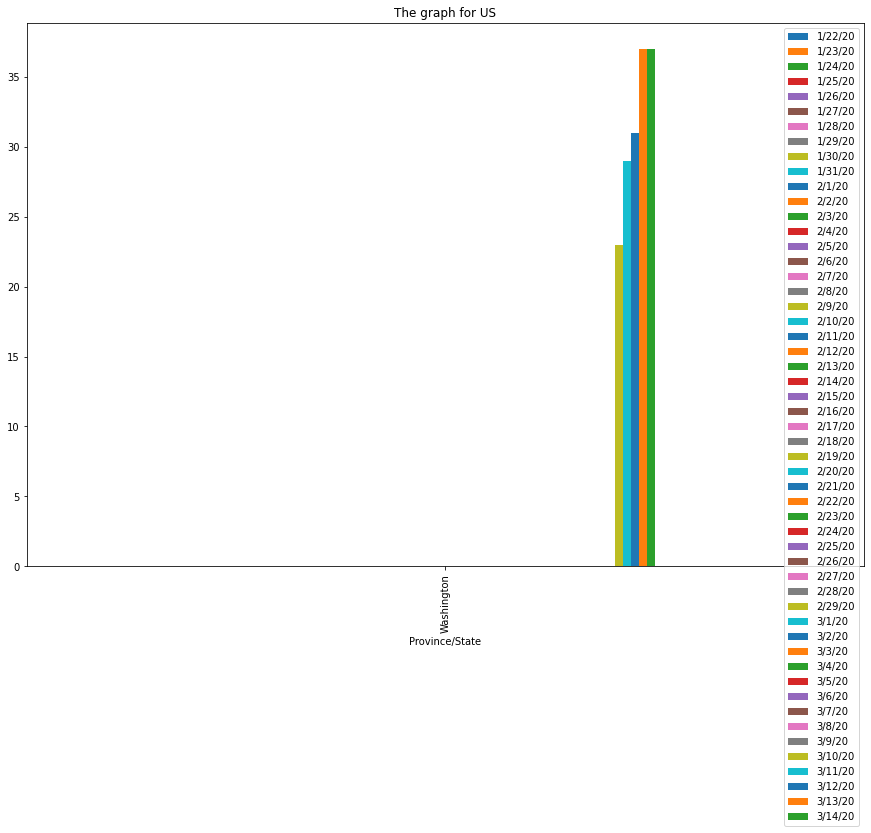

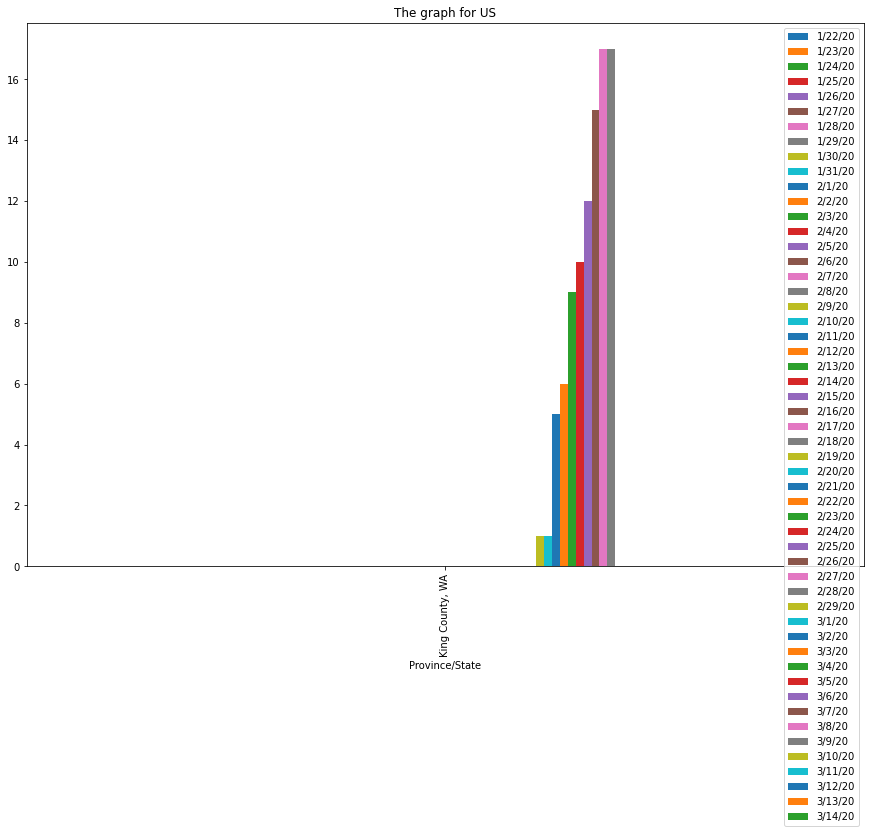

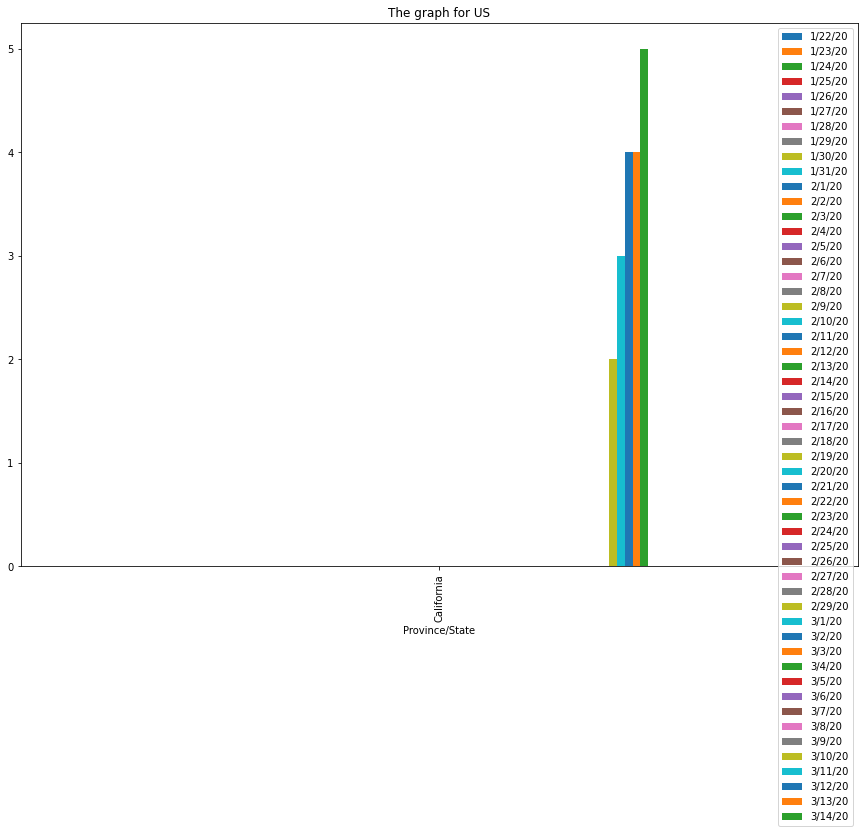

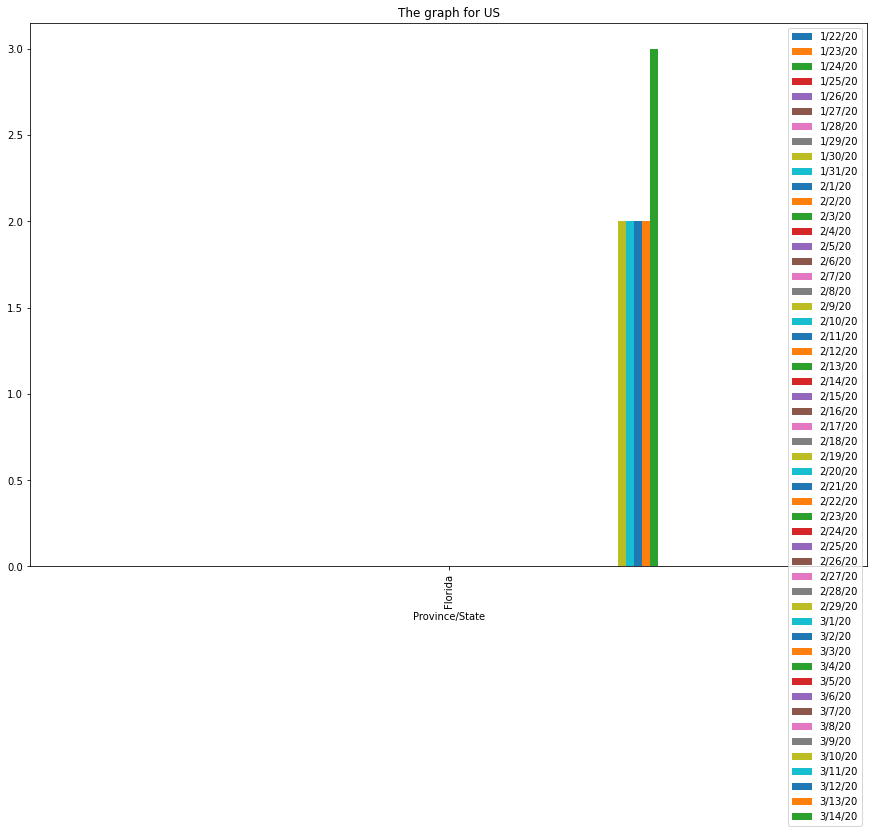

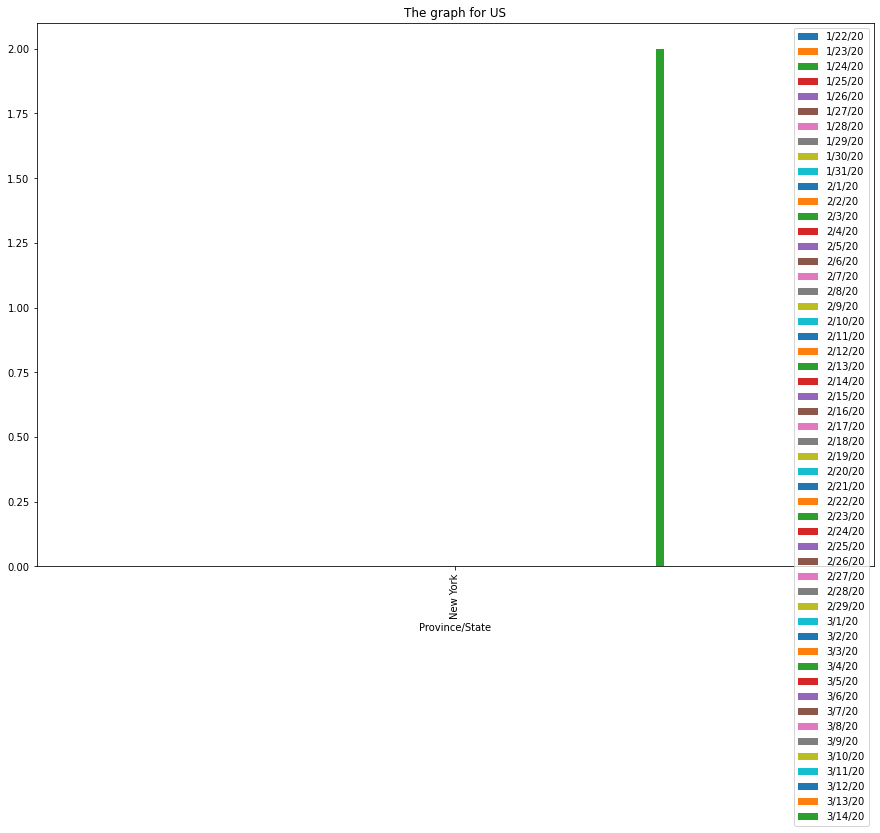

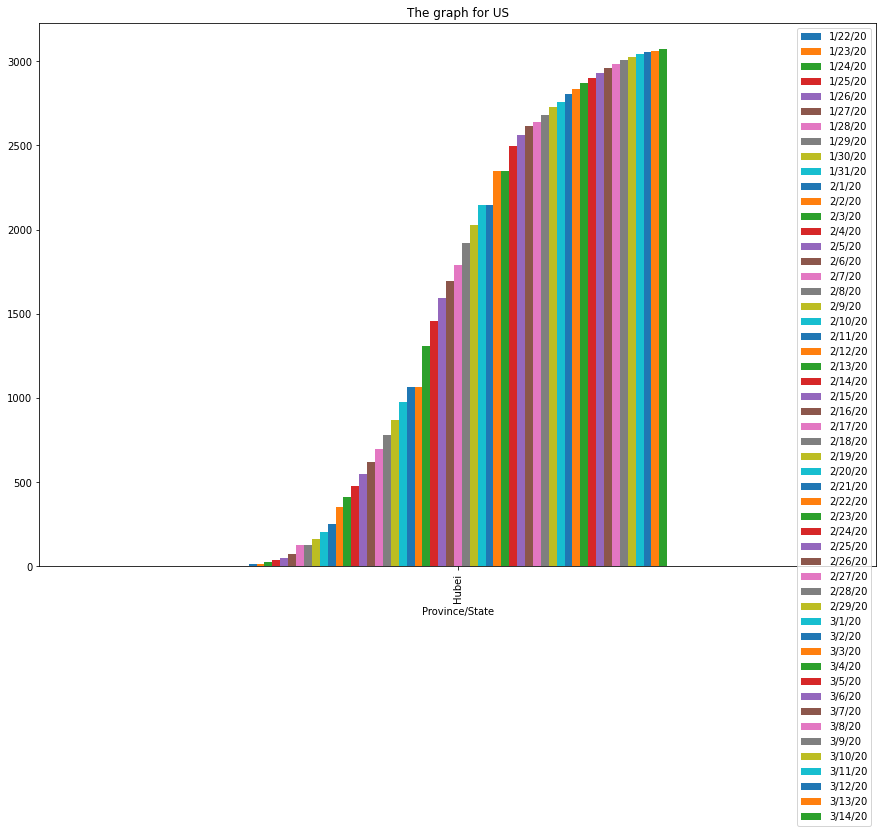

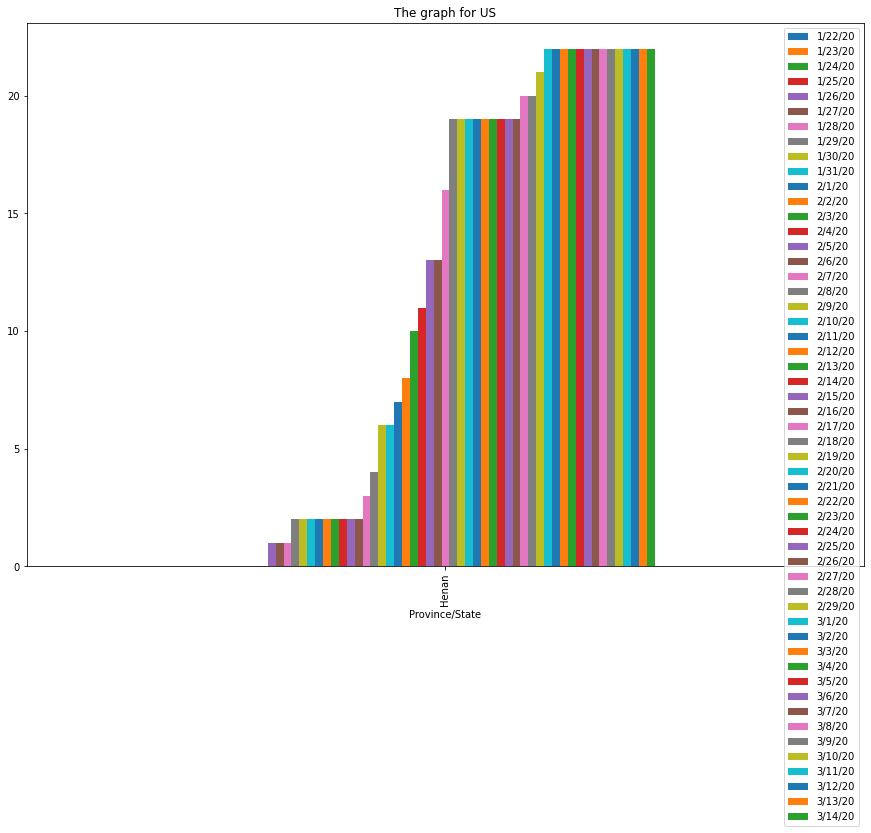

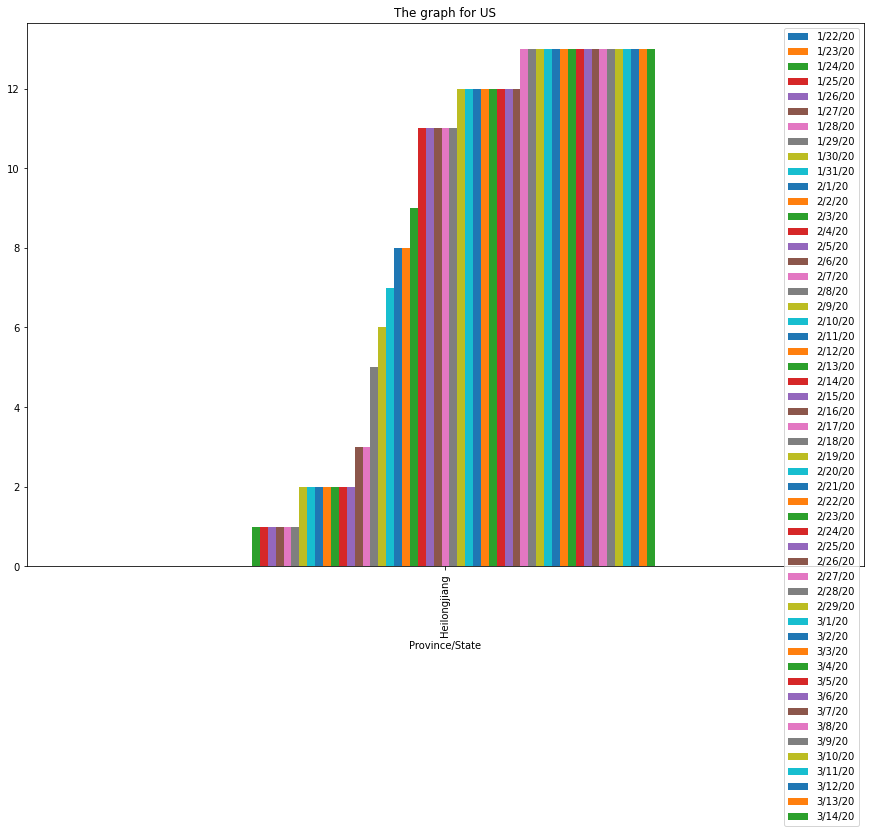

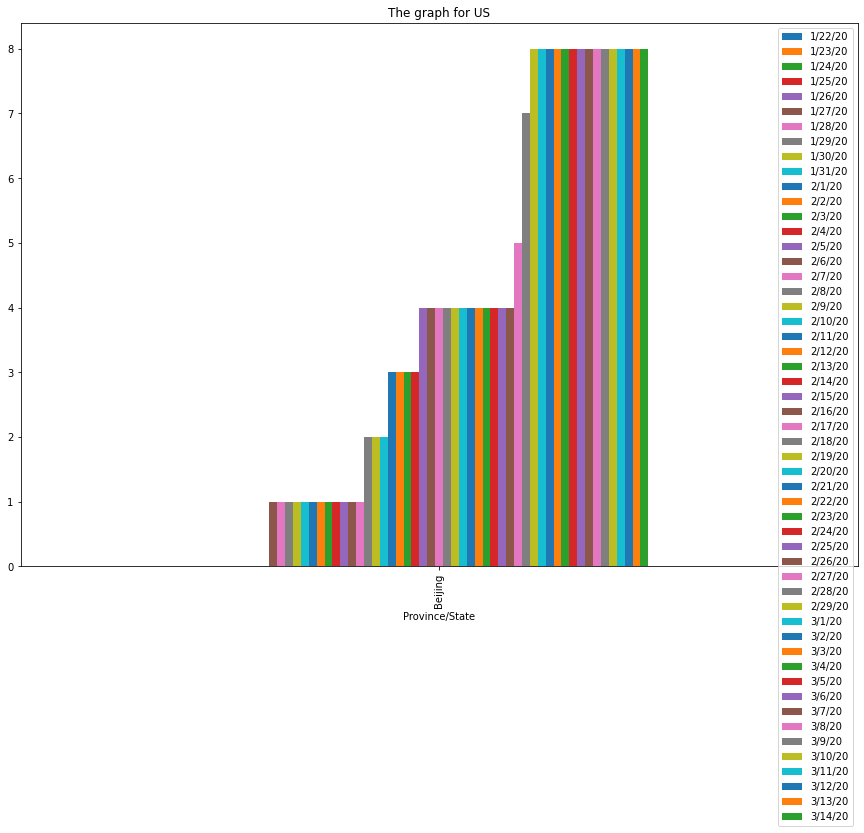

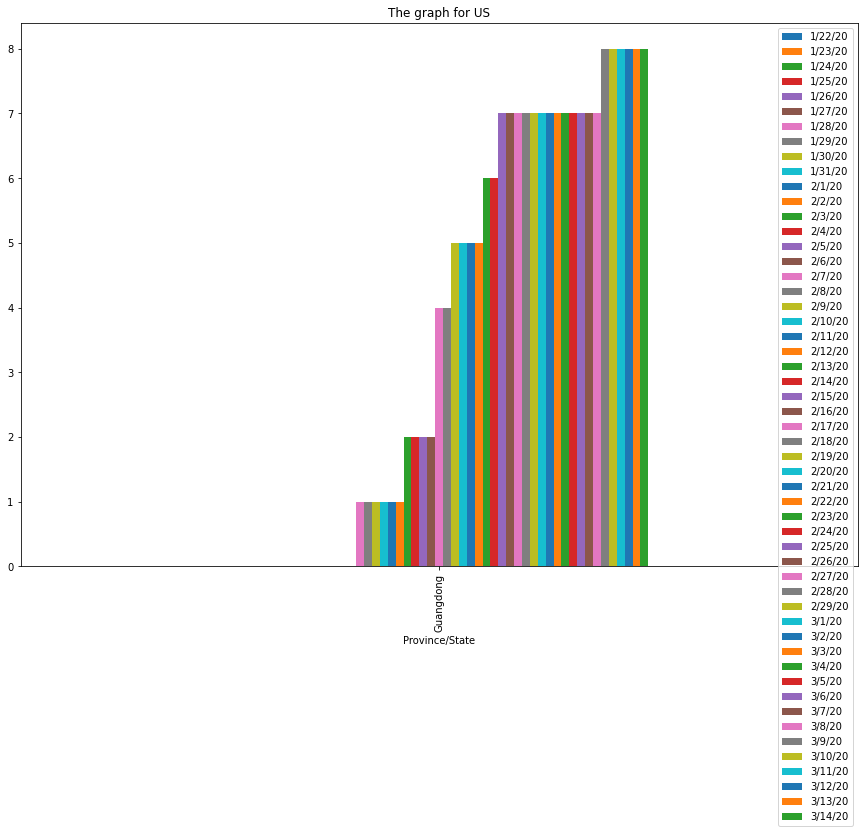

In [54]:
#TASK 3

#US
sorted_acc_deaths = cleaned_dataset.sort_values(by="Deaths",ascending=False)
boolean=sorted_acc_deaths["Country/Region"] == "US"
only_US = sorted_acc_deaths[boolean]
only_US = only_US.drop_duplicates(subset=["Province/State"], keep='first')
only_US = only_US["Province/State"].head(5)
for i in only_US:
  a = new_data[new_data["Province/State"]== i]
  #dropping lat and lon columns
  b = a.drop(['Lat', 'Long'], axis=1)
  b.plot.bar(x="Province/State",title="The graph for US",figsize=(15,10))

print("\n\n\n")

#China
sorted_acc_deaths = cleaned_dataset.sort_values(by="Deaths",ascending=False)
boolean=sorted_acc_deaths["Country/Region"] == "Mainland China"
only_China = sorted_acc_deaths[boolean]
only_China = only_China.drop_duplicates(subset=["Province/State"], keep='first')
only_China = only_China["Province/State"].head(5)
for i in only_China:
  a = new_data[new_data["Province/State"]== i]
  #dropping lat and lon columns
  b = a.drop(['Lat', 'Long'], axis=1)
  b.plot.bar(x="Province/State",title="The graph for US",figsize=(15,10))


print("The End")


#### Question # 05

This aspect is interesting since we would get to work with Geographical Plots. You have the latitude and longitude data from the `time_series_covid_19_deaths.csv` data file. You will use that for this question.

We will use BaseMap library to plot the latitude and longitude points on the world map.
You can download BaseMap by running the following command in your terminal/command line prompt: 
```
pip3 install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz
```

1. Once you have it installed, load up a basic world map and plot the values.
2. By visually examining, answer in which countries, the points scatter the most?

For reference and working directions with Basemap, you may take help from this video tutorial: <a href="https://www.youtube.com/watch?time_continue=114&v=XiZbrii49pI&feature=emb_title" BASEMAP >BASEMAP TUTORIAL</a>

In [55]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip


Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756043 sha256=8ac0d7f7998eb7fbd72bd625e87c87b83660373f49414c9427c99da76baa0778
  Stored in directory: /tmp/pip-ephem-wheel-cache-0kitag6r/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


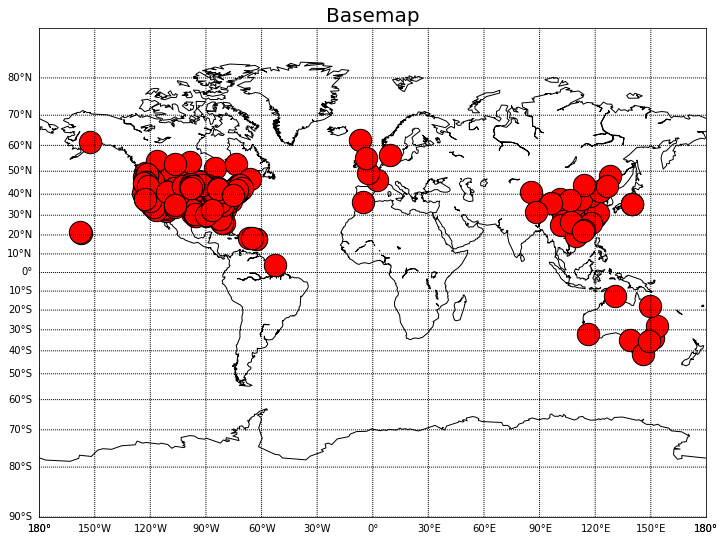



According to the plot we can see that Canada, China, Australia experience most scattered points


In [56]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')

m.drawcoastlines()

m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

sites_lat_y = new_data['Lat'].tolist()
sites_lon_x = new_data['Long'].tolist()

colors = ['red']

m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=500, c=colors, marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=2)

plt.title('Basemap', fontsize=20)

plt.show()

print("\n\nAccording to the plot we can see that Canada, China, Australia experience most scattered points")

#### Question # 06

For this question, we will use the `COVID19_open_line_list.csv` file. 

1. Read the data file and examine the features
2. We will be working with these feature columns: `age, sex, symptoms, city, province, lives_in_Wuhan, and travel_history_location`.
3. Since these are textual values, you need to encode them to integers (maintain an encoding dictionary as well).
    * For example in `symptoms` column, you might assign fever -> 1, pneumonia -> 2, headache -> 3, etc.
    * There are several multiple symptoms as well for a single row, for those you can just sum the assigned integers. For example a row might list these symptons: fever, headache, since fever -> 1 and headache -> 3, you can replace fever, headache with 1+3 = 4 and so on. Start the integer encoding from 1 so that when summing the numbers, you donot get the same number back (e.g. 0+3 = 3).
    * You can do the same for other columns, just to avoid ambiguity, you can encode each column differently. 
    * For example, for the `symptoms` column, you starting assigning numbers from 1, let's say there were 4 symptoms, so the numbers would range from 1 - 4. For the next column, you can use numbers from 5 and so on. You are free to encode as you want. 
    * For ease, you can also use sklearn's LabelEncoder.
4. Once you have integer coded the entire dataset (7 columns), you can compute the correlation between city (let city column be `y` for this case) and every other column.
5. Pick the most 2 correlated fields (using the absolute value of correlations) and make `X`.
6. Use MinMaxScaler to scale X. Note that this will output a `np.array`. Make it a DataFrame again and rename the columns appropriately.
7. Print the head (5 rows) and tail (5 rows) of this dataframe.

In [154]:
#TASK 1 and #TASK 2

data = pd.read_csv("COVID19_open_line_list.csv")
print(data)


        ID  age     sex  ... Unnamed: 42 Unnamed: 43 Unnamed: 44
0      1.0   30    male  ...         NaN         NaN         NaN
1      2.0   47    male  ...         NaN         NaN         NaN
2      3.0   49    male  ...         NaN         NaN         NaN
3      4.0   47  female  ...         NaN         NaN         NaN
4      5.0   50  female  ...         NaN         NaN         NaN
...    ...  ...     ...  ...         ...         ...         ...
14121  NaN  NaN     NaN  ...         NaN         NaN         NaN
14122  NaN  NaN     NaN  ...         NaN         NaN         NaN
14123  NaN  NaN     NaN  ...         NaN         NaN         NaN
14124  NaN  NaN     NaN  ...         NaN         NaN         NaN
14125  NaN  NaN     NaN  ...         NaN         NaN         NaN

[14126 rows x 45 columns]


In [155]:
#TASK 3

from sklearn.preprocessing import LabelEncoder

dataset_7 = data[["age", "sex", "symptoms", "city", "province", "lives_in_Wuhan", "travel_history_location"]]
dataset_7_copy = data[["age", "sex", "symptoms", "city", "province", "lives_in_Wuhan", "travel_history_location"]]
dataset_7_copy = dataset_7.replace("", np.nan, regex=True)
le = preprocessing.LabelEncoder()
dataset_7['age'] = le.fit_transform((dataset_7_copy['age']).astype(str))
dataset_7['sex'] = le.fit_transform((dataset_7_copy['sex']).astype(str))
dataset_7['symptoms'] = le.fit_transform((dataset_7_copy['symptoms']).astype(str))
dataset_7['city'] = le.fit_transform((dataset_7_copy['city']).astype(str))
dataset_7['province'] = le.fit_transform((dataset_7_copy['province']).astype(str))
dataset_7['lives_in_Wuhan'] = le.fit_transform((dataset_7_copy['lives_in_Wuhan']).astype(str))
dataset_7['travel_history_location'] = le.fit_transform((dataset_7_copy['travel_history_location']).astype(str))


print(dataset_7)


       age  sex  symptoms  ...  province  lives_in_Wuhan  travel_history_location
0       39    4       191  ...         5              21                      132
1       62    4       191  ...         5              11                       80
2       64    4       191  ...         5              11                      166
3       62    3       191  ...         5              11                      174
4       66    3       191  ...         5              11                      132
...    ...  ...       ...  ...       ...             ...                      ...
14121  116    5       191  ...       150              10                      174
14122  116    5       191  ...       150              10                      174
14123  116    5       191  ...       150              10                      174
14124  116    5       191  ...       150              10                      174
14125  116    5       191  ...       150              10                      174

[14126 rows x 7

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [156]:
#TASK 4

city_col = data["city"]
rest_col = dataset_7

correlation = rest_col[rest_col.columns[0:]].corr()['city'][:]
print("The correlation of all columns with city are as follows: ","\n")
print(correlation)

The correlation of all columns with city are as follows:  

age                        0.110645
sex                        0.123058
symptoms                   0.052526
city                       1.000000
province                   0.253183
lives_in_Wuhan            -0.042209
travel_history_location    0.054016
Name: city, dtype: float64


In [169]:
#TASK 5 

x = dataset_7[["sex", "province"]]
print("The top two correlated fields (province, sex) are as follows: ", "\n")
print(x)


The top two correlated fields (province, sex) are as follows:  

       sex  province
0        4         5
1        4         5
2        4         5
3        3         5
4        3         5
...    ...       ...
14121    5       150
14122    5       150
14123    5       150
14124    5       150
14125    5       150

[14126 rows x 2 columns]


In [179]:
#TASK 6

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x = pd.DataFrame(x_scaled)
x = x.rename(columns={0:"sex",1:"province"})
print("Noramlized values are as follows: ", "\n")
print(x)


print("\n\n")

print("The top 5 rows are as follows: ", "\n")
print(x.head(5))


print("\n\n")
print("Last 5 rows are as follows: ", "\n")
print(x.tail(5))

Noramlized values are as follows:  

       sex  province
0      0.8  0.033333
1      0.8  0.033333
2      0.8  0.033333
3      0.6  0.033333
4      0.6  0.033333
...    ...       ...
14121  1.0  1.000000
14122  1.0  1.000000
14123  1.0  1.000000
14124  1.0  1.000000
14125  1.0  1.000000

[14126 rows x 2 columns]



The top 5 rows are as follows:  

   sex  province
0  0.8  0.033333
1  0.8  0.033333
2  0.8  0.033333
3  0.6  0.033333
4  0.6  0.033333



Last 5 rows are as follows:  

       sex  province
14121  1.0       1.0
14122  1.0       1.0
14123  1.0       1.0
14124  1.0       1.0
14125  1.0       1.0
